## Basic Steps
The basic steps we'll take are:

- Use DuckDuckGo to search for images of "happy humans"
- Use DuckDuckGo to search for images of "sad humans"
- Fine-tune a pretrained neural network to recognise these two groups
- Try running this model on a happy human and see if it works.

We can also try out feeding different emotions to the classifier and try to determine what emotions the classifier thinks as happy

## Step 1: Download images of happy and sad people


First lets run this pip code so the latest versions of the fastai and duckduckgo_search packages will be installed (or upgraded if they are already installed) in your Python environment

In [1]:
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00



Let's start by searching for a happy human photo and seeing what kind of result we get.

First we will create function to `search_images`.

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Code Explanation:

1. Import libraries: The function imports the `ddg_images` function from the `duckduckgo_search` library and all modules from the `fastcore` library.

2. Define the `search_images` function: This function takes two arguments:
   - `term`: The search term for which images are to be searched.
   - `max_images`: The maximum number of images to retrieve (default is 30).

3. Search for images: The function prints a message indicating that it's searching for images with the given search term. It then calls the `ddg_images` function with the provided search term and maximum number of images. The `ddg_images` function returns a list of dictionaries, where each dictionary contains information about an image, including the image URL.

4. Extract image URLs: The function uses the `fastcore` library's `L` function to create a list-like object from the list of dictionaries. The `itemgot` method is then used to extract the 'image' key from each dictionary, which contains the URL of the corresponding image.

5. Return the image URLs: The function returns the list of image URLs found during the search.



Lets run the function and take a look at the URL

In [4]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('happy human', max_images=1)
urls[0]

Searching for 'happy human'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://www.personalenrichmentcenter.com/wp-content/uploads/2016/01/Happy-Human.jpg'

This only shows the URL. We cannot look at the image without pasting the URL in a browser.
Lets make use of PIL library to open the image and view it here.

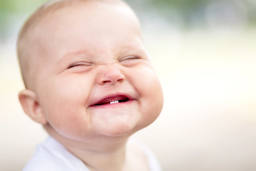

In [6]:
from fastdownload import download_url
dest = 'happy.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Code Explanation:

1. `from fastdownload import download_url`: This line imports the `download_url` function from the `fastdownload` library. This function is used to download files from a URL.

2. `dest = 'happy.jpg'`: This line sets the destination file name for the downloaded image. In this case, the image will be saved as 'happy.jpg' in the current working directory.

3. `download_url(urls[0], dest, show_progress=False)`: This line downloads the image from the URL at `urls[0]` and saves it to the file specified in the `dest` variable. The `show_progress=False` argument disables the progress bar during the download.

4. `from fastai.vision.all import *`: This line imports all the necessary modules from the `fastai.vision` library, which is part of the FastAI library suite. The `fastai.vision.all` module provides various functions and classes for computer vision tasks.

5. `im = Image.open(dest)`: This line opens the image file specified in the `dest` variable using the `Image.open` function from the `PIL` (Python Imaging Library) module. The `Image.open` function returns an `Image` object representing the image.

6. `im.to_thumb(256, 256)`: This line resizes and displays the image represented by the `im` object as a thumbnail. The `to_thumb` method resizes the image while maintaining its aspect ratio and then displays it. The arguments `256, 256` specify the width and height of the thumbnail.

Now let's do the same with "sad human photos":

Searching for 'sad humans'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


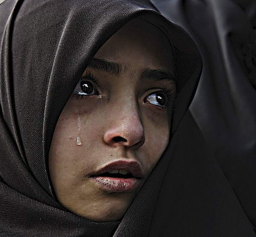

In [7]:
download_url(search_images('sad humans', max_images=1)[0], 'sad.jpg', show_progress=False)
Image.open('sad.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "happy" and "sad" human photos, and save each group of photos to a different folder (I'm also trying to grab a range of key words here):

In [8]:
searches = 'happy human','sad human'
path = Path('happy_or_sad')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} face'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} image'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'happy human photo'
Searching for 'happy human face'
Searching for 'happy human image'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'sad human photo'
Searching for 'sad human face'
Searching for 'sad human image'


Code Explanation:

1. `searches = 'happy human', 'sad human'`: This line defines two search terms, "happy human" and "sad human," which will be used for image searches.

2. `path = Path('happy_or_sad')`: This line sets the `path` variable to a `Path` object representing the directory where the downloaded images will be saved. The directory is named 'happy_or_sad'.

3. `from time import sleep`: The script imports the `sleep` function from the `time` module, which will be used to introduce delays between consecutive image searches.

4. The `for` loop iterates over each search term in `searches`:
   - `dest = (path/o)`: The `dest` variable is set to the directory path where the images for the current search term will be saved. eg: 'happy_or_sad/happy human/' and 'happy_or_sad/sad human/'
   -  `dest.mkdir(exist_ok=True, parents=True)`: The directory specified in `dest` is created if it does not exist already.
   -  `download_images(dest, urls=search_images(f'{o} photo'))`: The `download_images` function is called to download images related to the search term with "photo" in the query (e.g., "happy human photo"). The downloaded images are saved in the directory specified by `dest`.
   -  `sleep(10)`: The script pauses for 10 seconds before the next download to avoid overloading the server.
   -  The same process is repeated for "face" and "image" queries (i.e., `download_images(dest, urls=search_images(f'{o} face'))` and `download_images(dest, urls=search_images(f'{o} image'))`), with 10-second pauses between each search.

5. `resize_images(path/o, max_size=400, dest=path/o)`: Finally, after downloading all the images for each search term, the `resize_images` function is called to resize all the images in the directory specified by `path/o` to a maximum size of 400 pixels.

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

Code Explanation:


1. `failed = verify_images(get_image_files(path))`: This line first uses the `get_image_files` function from the `fastai.vision.all` module to get a list of image file paths in the directory specified by the `path` variable. Then, the `verify_images` function is called on this list to check for corrupted or invalid images. The `failed` variable will contain a list of file paths of images that failed the verification.

2. `failed.map(Path.unlink)`: This line iterates over each file path in the `failed` list and calls the `unlink` method on each `Path` object. The `unlink` method deletes the file from the file system, effectively removing any corrupted or invalid images.

3. `len(failed)`: This line returns the number of images that failed the verification process, representing the number of images that were deleted.


## Step 2: Train our model

To train a model, we'll need DataLoaders, which is an object that contains a training set (the images used to create a model) and a validation set (the images used to check the accuracy of a model -- not used during training). In fastai we can create that easily using a DataBlock, and view sample images from it:

The below code sets up a data pipeline for image classification, where images are loaded, transformed, and split into training and validation sets. It also displays a batch of images from the dataset for visualization purposes.

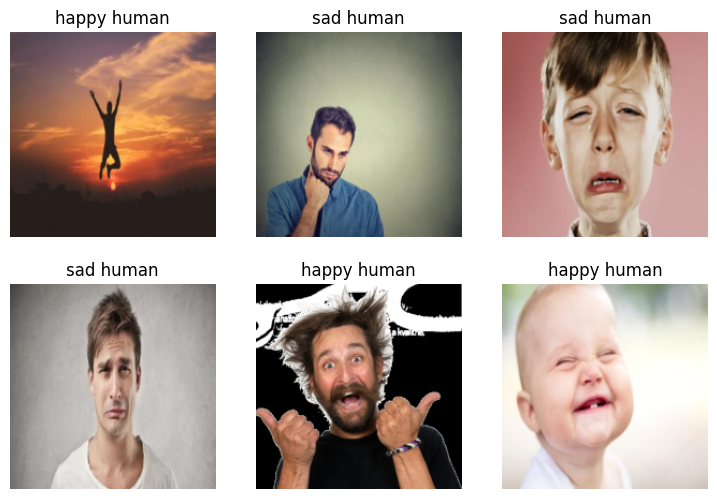

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Code Explanation:

1. `DataBlock`: The `DataBlock` is a class in `fastai` used to define the data pipeline for a machine learning task.

2. `blocks=(ImageBlock, CategoryBlock)`: This line specifies the types of data blocks used in the `DataBlock`. In this case, it uses `ImageBlock` for processing image data and `CategoryBlock` for the category labels (target) since it's an image classification task.

3. `get_items=get_image_files`: This sets the function to get a list of image file paths. In this case, `get_image_files` is used to retrieve a list of image file paths from the directory specified in the `path` variable.

4. `splitter=RandomSplitter(valid_pct=0.2, seed=42)`: This line defines how to split the data into training and validation sets. The `RandomSplitter` randomly shuffles the data and uses 20% of the data as the validation set, with a random seed of 42 for reproducibility.

5. `get_y=parent_label`: This sets the function to extract the category label (target) from the image file path. The `parent_label` function extracts the label based on the parent folder's name where the image file is located.

6. `item_tfms=[Resize(192, method='squish')]`: This line specifies the data transformations to be applied to each item (image) in the data pipeline. In this case, it resizes each image to a target size of 192x192 pixels using the 'squish' method, which may distort the aspect ratio.

7. `.dataloaders(path, bs=32)`: This line generates the `DataLoaders` object that contains the training and validation data loaders. It loads the data from the directory specified by `path` and sets the batch size to 32.

8. `dls.show_batch(max_n=6)`: This line displays a batch of images from the data loaders. It shows a maximum of 6 images with their corresponding category labels.

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

The below code trains a vision model using transfer learning on a pre-trained ResNet-18 architecture. It uses the `fastai` library to set up the data loaders, create the vision learner, and perform fine-tuning for 3 epochs.


In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 87.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.072791,1.275307,0.393939,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.515549,0.599418,0.151515,00:28
1,0.332588,0.549598,0.181818,00:29
2,0.251334,0.510687,0.212121,00:28


Code Explanation:


1. `learn = vision_learner(dls, resnet18, metrics=error_rate)`: This line creates a vision learner object named `learn`. It uses the `vision_learner` function from `fastai.vision.learner` to set up the learner with the following arguments:
   - `dls`: The data loaders object containing the training and validation data.
   - `resnet18`: The pre-trained ResNet-18 architecture to be used as the base model for transfer learning.
   - `metrics=error_rate`: The error rate metric will be used to evaluate the model's performance during training.

2. `learn.fine_tune(3)`: This line performs fine-tuning on the model. The `fine_tune` method is used to fine-tune the pre-trained ResNet-18 model using the data provided by the data loaders (`dls`). The argument `3` specifies that fine-tuning will be performed for 3 epochs.

During fine-tuning, the pre-trained ResNet-18 model's weights are updated on the new dataset (`dls`) while the earlier layers are "frozen" (not updated) to retain their learned features. This approach leverages the knowledge gained from training on large datasets to improve performance on the specific image classification task at hand.

After running this code, the `learn` object will contain the trained model, and you can use it to make predictions or further fine-tune the model if needed. Additionally, you can evaluate the model's performance using different metrics provided by the `fastai` library.

## Step 3: Use our trained model

Let's see what our model thinks about that happy human we downloaded at the start:


The below code uses a trained `fastai` vision learner to make prediction on happy or sad and outputs the predicted label along with the probability of the prediction.

In [17]:
predicted_label,_,probs = learn.predict(PILImage.create('happy.jpg'))
print(f"This is a: {predicted_label}.")
print(f"Probability it's a {predicted_label}: {probs[0]:.4f}")

This is a: happy human.
Probability it's a happy human: 0.9999


Similarly lets check out the sad human photo.

In [18]:
predicted_label,_,probs = learn.predict(PILImage.create('sad.jpg'))
print(f"This is a: {predicted_label}.")
print(f"Probability it's a {predicted_label}: {probs[0]:.4f}")

This is a: sad human.
Probability it's a sad human: 0.1502


Code Explanation:

1. `predicted_label, _, probs = learn.predict(PILImage.create('sad.jpg'))`: This line uses the `learn.predict()` method to make a prediction on the image 'sad.jpg'. The method takes an image as input and returns a tuple containing:
   - `predicted_label`: The predicted label for the image.
   - `_`: An intermediate output, which is not used in this case.
   - `probs`: A list containing the probabilities for each class predicted by the model.

2. `print(f"This is a: {predicted_label}.")`: This line prints the predicted label (`predicted_label`) for the image. The specific label will depend on the classes used during training (e.g., 'happy human' or 'sad human').

3. `print(f"Probability it's a {predicted_label}: {probs[0]:.4f}")`: This line prints the probability of the image belonging to the predicted class (`predicted_label`). The probability is accessed using `probs[0]`, which represents the probability value of the first class (index 0) in the `probs` list. The `:.4f` format specifier is used to display the probability with four decimal places.


In [24]:
predicted_label,_,probs = learn.predict(PILImage.create('photo-1624272949900-9ae4c56397e8.jpeg'))
print(f"This is a: {predicted_label}.")
print(f"Probability it's a {predicted_label}: {probs[0]:.4f}")

This is a: happy human.
Probability it's a happy human: 0.9996
